## Assignment-

### Logistic Regression: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_datanew.csv')
df.head()

,age,bought_insurance
0,22,No
1,25,No
2,47,Yes
3,52,No
4,46,Yes


In [3]:
df = pd.get_dummies(df, drop_first = True)
df

,age,bought_insurance_Yes
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


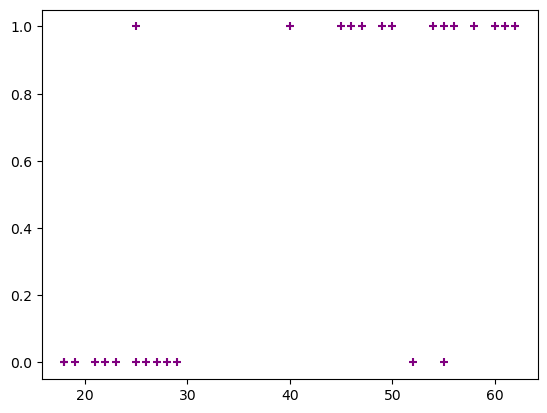

In [5]:
plt.scatter(df.age,df.bought_insurance_Yes,marker= '+', color='purple' )

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance_Yes, train_size=0.8)
X_test

,age
23,45
11,28
19,18
24,50
14,49
20,21


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

,age
23,45
11,28
19,18
24,50
14,49
20,21


In [11]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0, 1, 1, 0], dtype=uint8)

In [12]:
y_test

23    1
11    0
19    0
24    1
14    1
20    0
Name: bought_insurance_Yes, dtype: uint8

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
model.predict_proba(X_test) # getting percentage probability

array([[0.35666252, 0.64333748],
       [0.7956525 , 0.2043475 ],
       [0.92455723, 0.07544277],
       [0.23809005, 0.76190995],
       [0.25950952, 0.74049048],
       [0.89678117, 0.10321883]])

In [15]:
X_test

,age
23,45
11,28
19,18
24,50
14,49
20,21


###### *model.coef_ indicates value of m in y=mx + b equation**

In [16]:
model.coef_

array([[0.11466]])

###### *model.intercept_ indicates value of b in y=mx + b equation**

In [17]:
model.intercept_

array([-4.56982055])

##### Lets defined sigmoid function now and do the math with hand

In [19]:
import math
def sigmoid(x):
    return 1/ (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    z = 0.1142 * age - 4.478     # (m=0.1142, b=-4.478)
    y = sigmoid(z)
    return y

In [21]:
age = 35
prediction_function(age)

0.3820160176136095

### 0.3820 is less than 0.5 which means person with 35 age will not buy insurance

In [22]:
age = 39
prediction_function(age)

0.49395029524287615

In [23]:
age = 40
prediction_function(age)

0.5224848247918

### 0.5224 is more than 0.5 which means person with 40 will buy the insurance 
### Our Mid-point lies between age 39 and 40.

In [27]:
model.predict([[39]])

array([0], dtype=uint8)

In [28]:
model.predict([[40]])

array([1], dtype=uint8)

In [29]:
model.predict([[43]])

array([1], dtype=uint8)